# Python Project : ObesityDataSet_raw_and_data_sinthetic

### Quentin Berthault & Aref Bitar  DIA 2

## Imports librairies

In [2]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


##### install if it's necessary 

In [25]:
#pip install displot

## Import data

In [3]:
data=pd.read_csv('https://github.com/Tintintin1234/Projet-Python-Data-Analyse/blob/b7c48827d8801d2fcb6ddb900a7682c7ef093075/ObesityDataSet_raw_and_data_sinthetic.csv?raw=true')
#data=pd.read_csv('C:/Users/quent/Desktop/Projet Data Python/ObesityDataSet_raw_and_data_sinthetic.csv')

df=data.copy()

## Rename columns with more explicit words

In [30]:
data.columns = ['Gender', 'Age', 'Height', 'Weight', 'family history with overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [5]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity'],
      dtype='object')


## View of some characteristic about data

In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
print(data.shape)

(2111, 17)


In [8]:
data.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

## Check for NA & null :

In [19]:
print("Numbers of NA by columns : \n")
data.isna().sum()

Numbers of NA by columns : 



Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [20]:
print("Numbers of null by columns : \n")
data.isna().sum()

Numbers of null by columns : 



Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

New variables :

In [33]:
homme=data[data['Gender']=='Male']
femme=data[data['Gender']=='Female']


insufficient=data[data['Obesity']== 'Insufficient_Weight']
normal=data[data['Obesity']== 'Normal_Weight']
overweightI=data[data['Obesity']== 'Overweight_Level_I']
overweightII=data[data['Obesity']== 'Overweight_Level_II']
obesityI=data[data['Obesity']== 'Obesity_Type_I']
obesityII=data[data['Obesity']== 'Obesity_Type_II']
obesityIII=data[data['Obesity']== 'Obesity_Type_III']


## Data Visualization 

C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Homme and Femme Weight/Height')

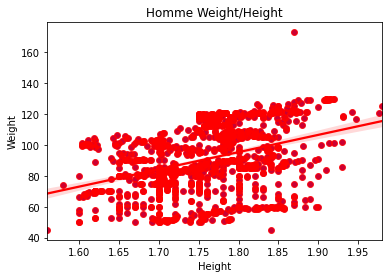

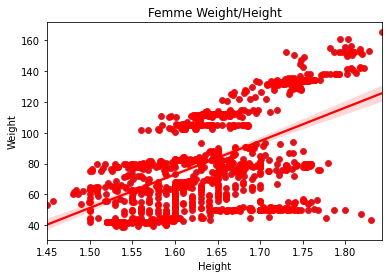

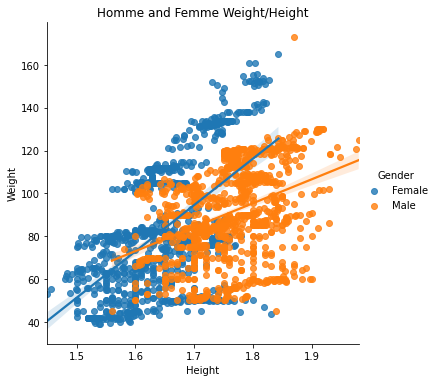

In [23]:
ax1 = homme.plot.scatter(x='Height',y='Weight', color='b')
sns.regplot(homme.Height, homme.Weight, color='r')
plt.title("Homme Weight/Height")

ax2= femme.plot.scatter(x='Height',y='Weight')
sns.regplot(femme.Height, femme.Weight, color='r')
plt.title("Femme Weight/Height")

ax3= sns.lmplot(x="Height", y="Weight", hue="Gender", data=df)
ax3.set_axis_labels("Height", "Weight")
plt.title("Homme and Femme Weight/Height")


### Boxplot 

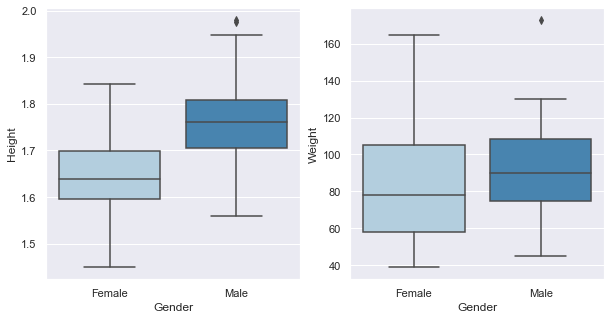

In [39]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', palette="Blues", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight',palette="Blues", data=data)

## Some visualization of quantitative information 

In [29]:
data.select_dtypes('double')

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


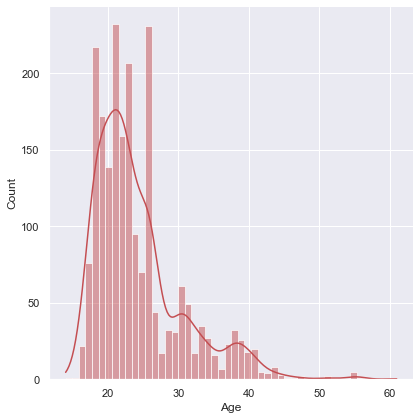

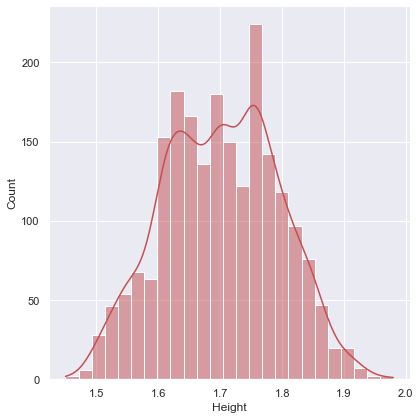

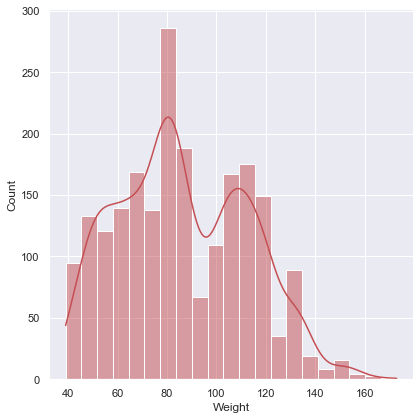

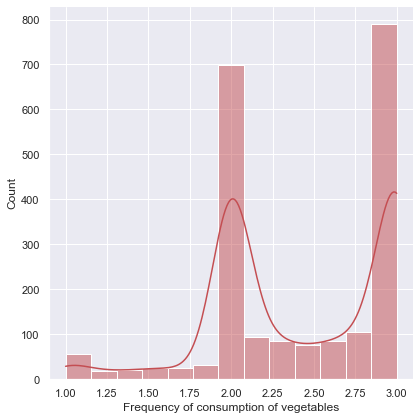

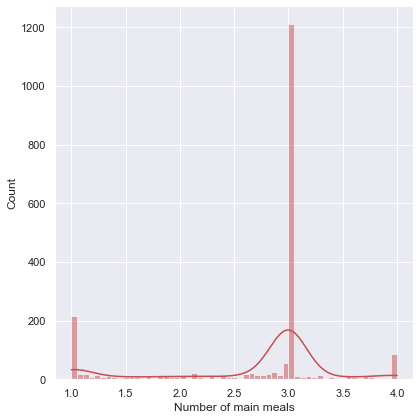

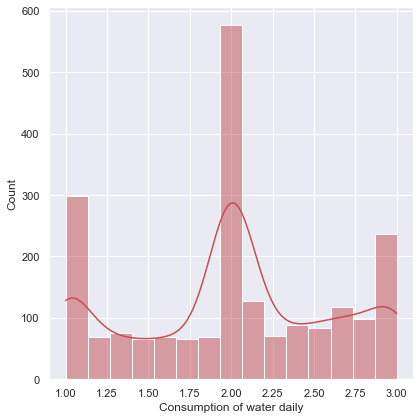

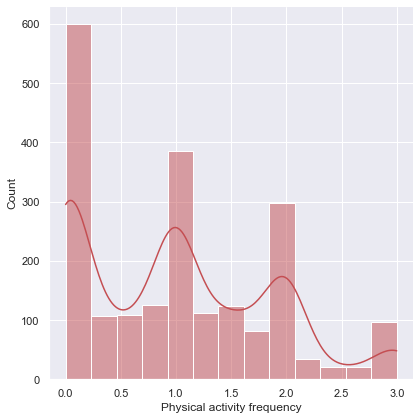

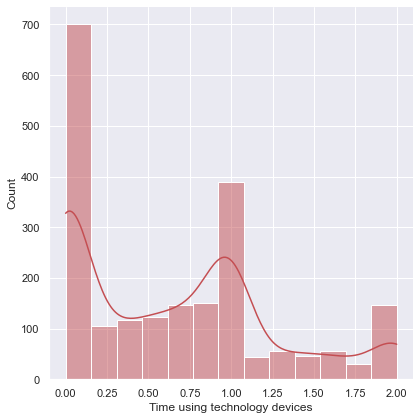

In [28]:
for i in data.select_dtypes('double'):
    ax=sns.displot(data[i], kind="hist", kde=True,  height=6, color='r')

## Some visualization of qualitative information 

In [29]:
data.select_dtypes('object')

,Gender,family_history_with_overweight,Frequent consumption of high caloric food,Consumption of food between meals,Smoke,Calories consumption monitoring,Consumption of alcohol,Transportation used,Obesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [27]:
for i in data.select_dtypes('object'):
    print(f'{i: <45} {data[i].unique()}')

Gender                                        ['Female' 'Male']
family_history_with_overweight                ['yes' 'no']
Frequent consumption of high caloric food     ['no' 'yes']
Consumption of food between meals             ['Sometimes' 'Frequently' 'Always' 'no']
Smoke                                         ['no' 'yes']
Calories consumption monitoring               ['no' 'yes']
Consumption of alcohol                        ['no' 'Sometimes' 'Frequently' 'Always']
Transportation used                           ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity                                       ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### barplot

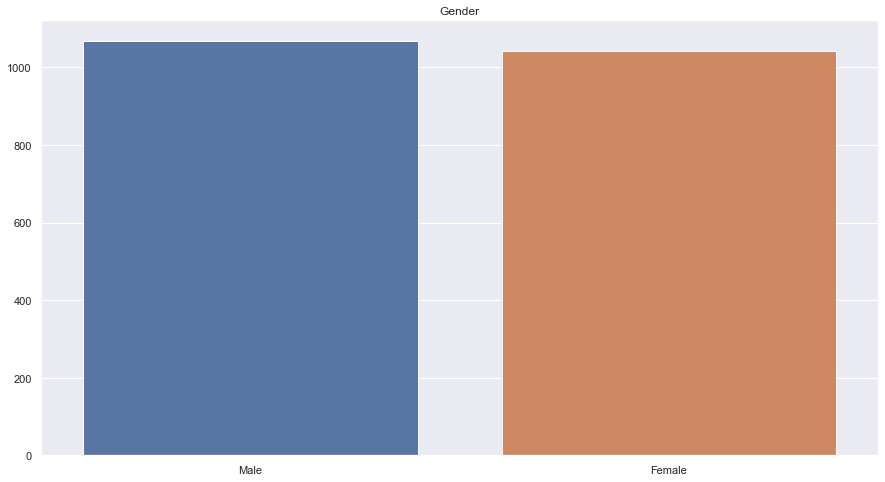

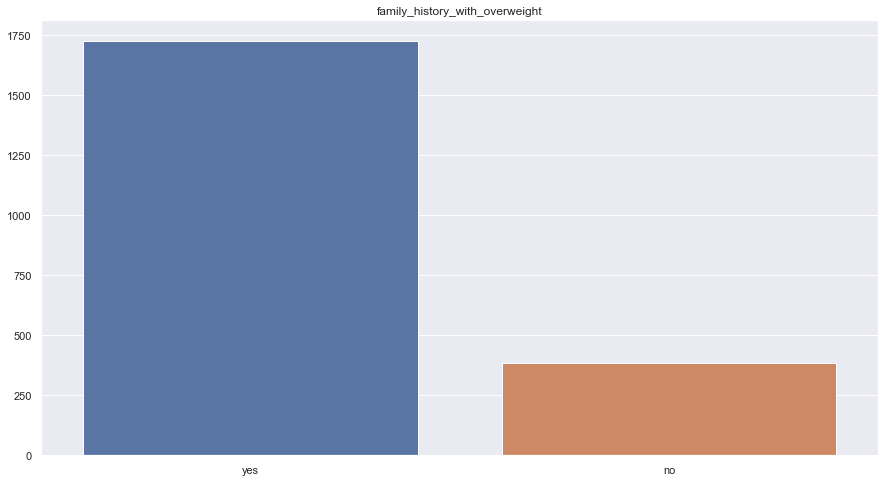

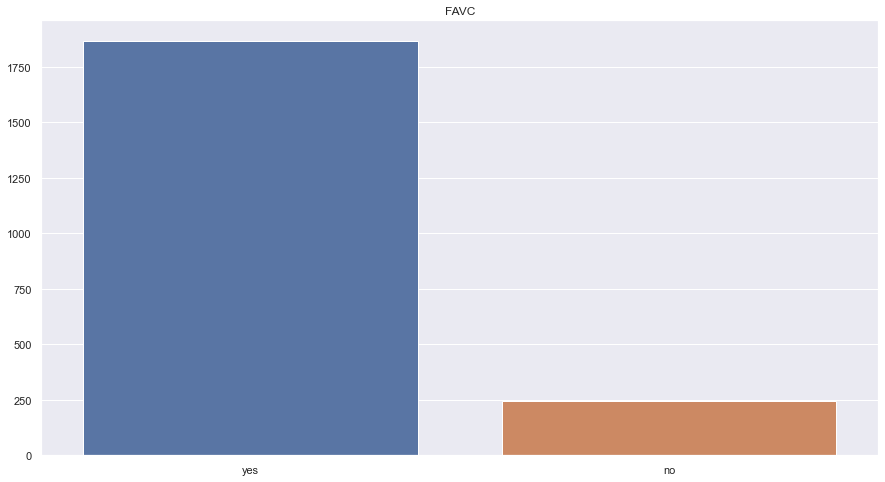

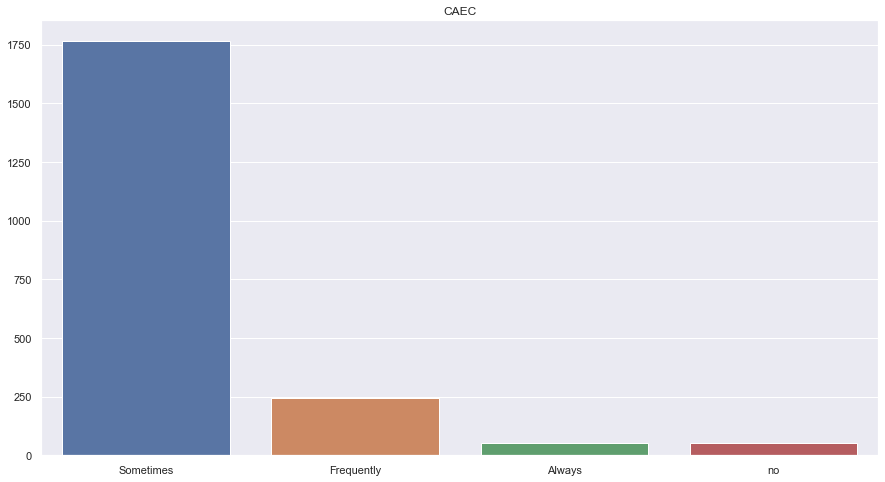

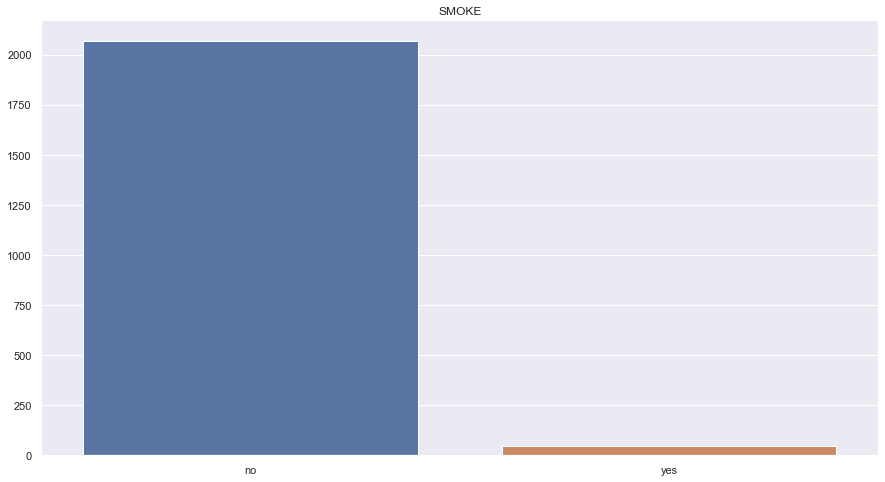

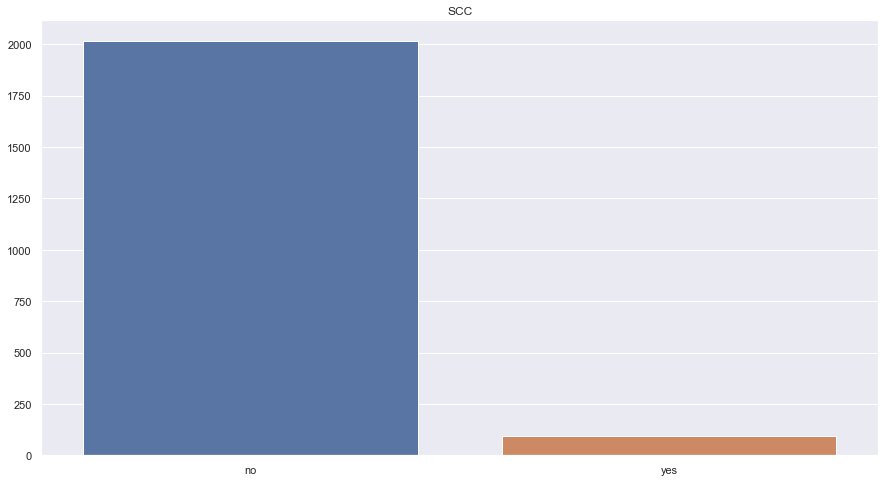

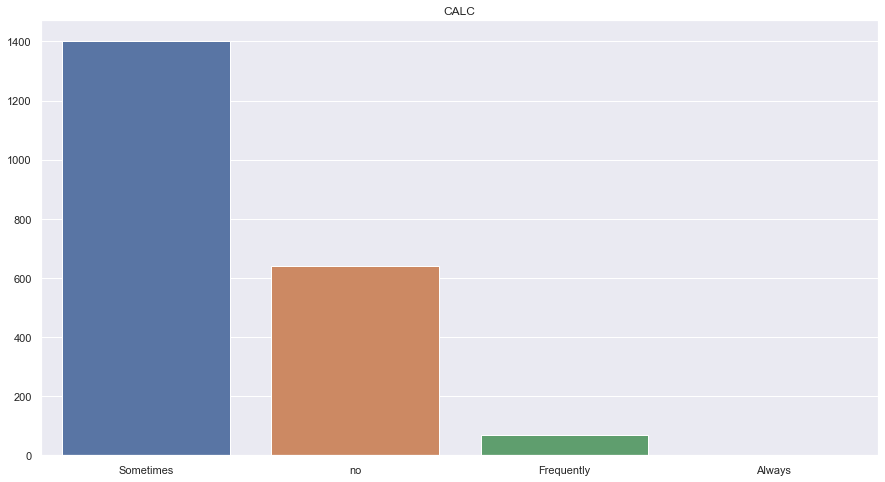

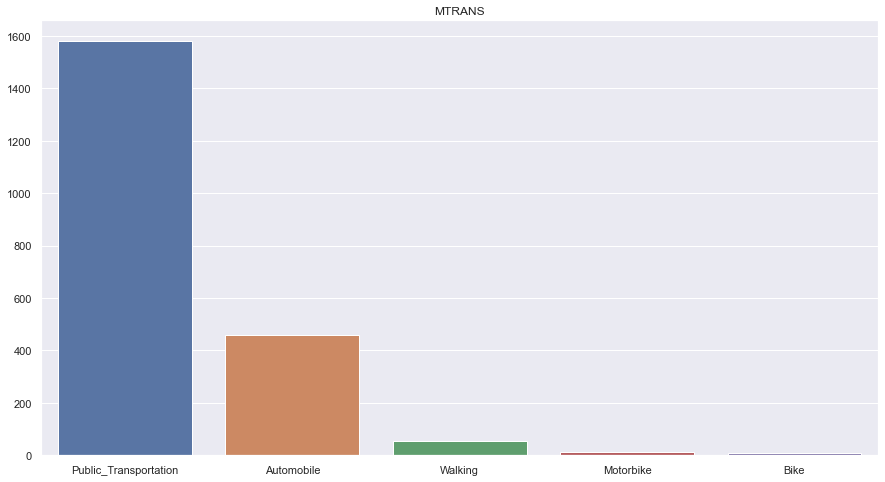

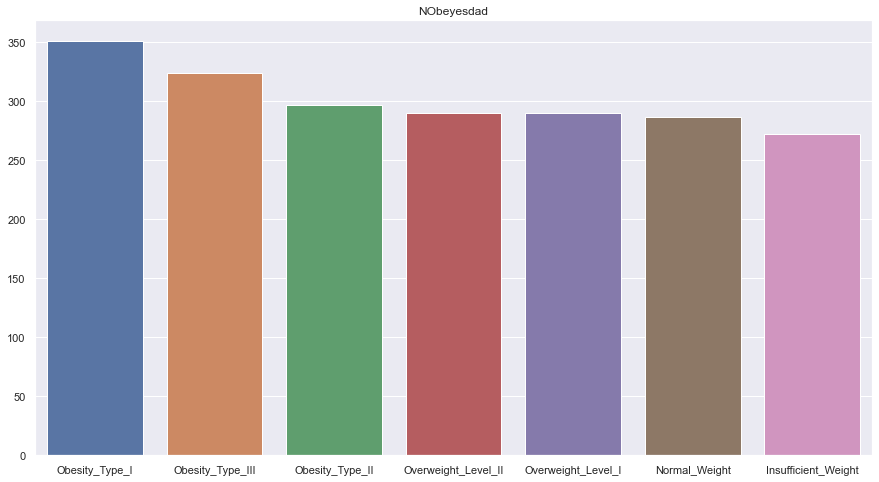

In [57]:
for i in df.select_dtypes('object'):    
    plt.figure(figsize=(15,8))
    plt.title(i)    
    ax = sns.barplot(x = df[i].value_counts().index.to_list(), y = df[i].value_counts().to_list())    


### plot.pie

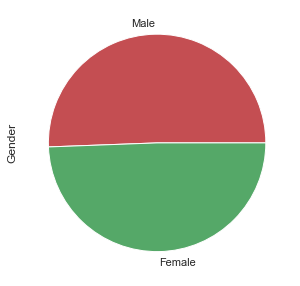

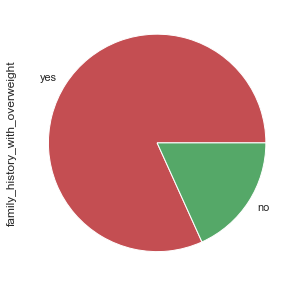

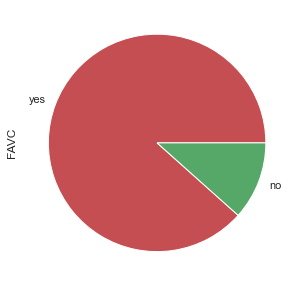

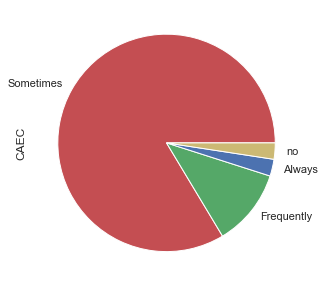

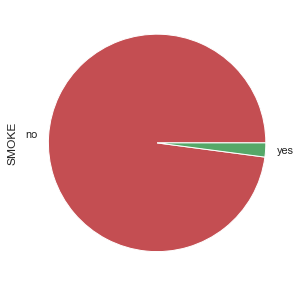

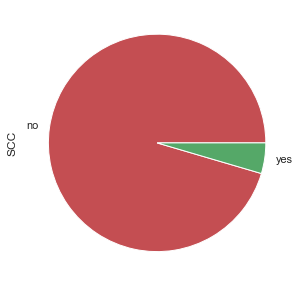

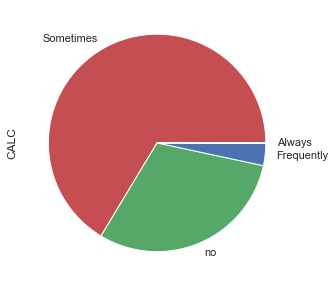

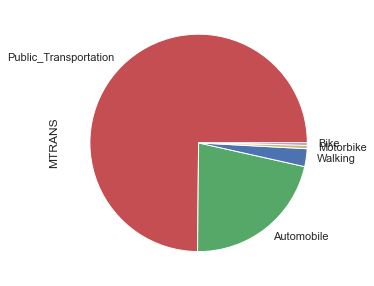

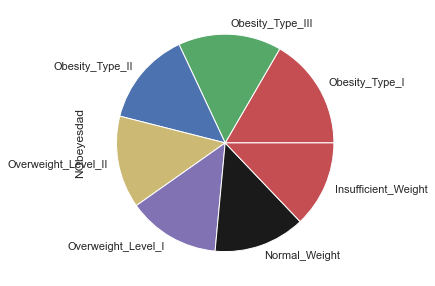

In [32]:
for i in df.select_dtypes('object'):
    fig=plt.figure(figsize=(5,5))
    ax=df[i].value_counts().plot.pie(colors='rgbymk')

## Link between Obesity and quantitative variable 

C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated fun

C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\quent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


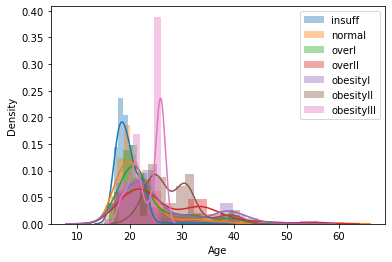

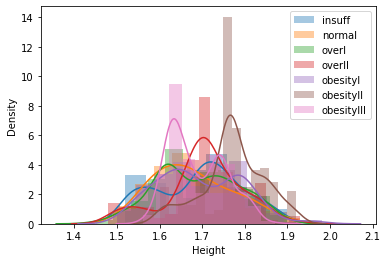

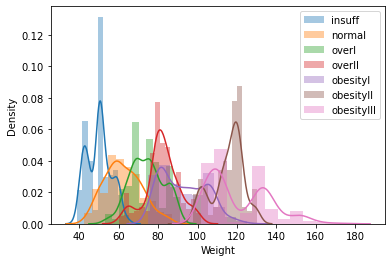

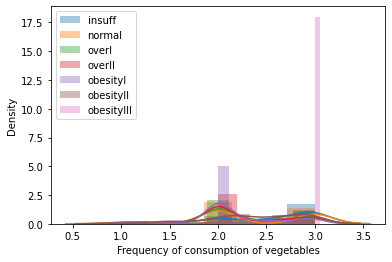

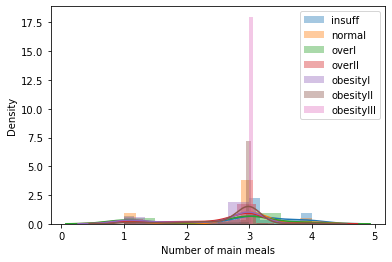

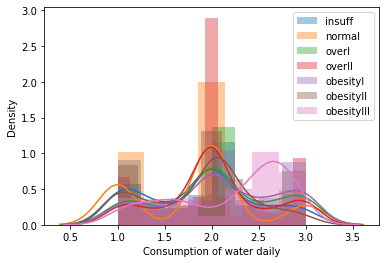

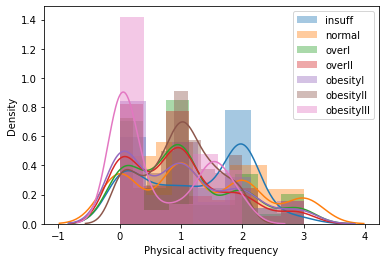

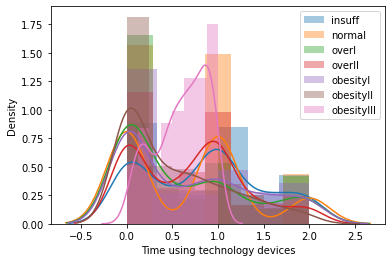

In [38]:
for i in data.select_dtypes('double'):
    plt.figure()
    sns.distplot(insufficient[i], label = 'insuff')
    sns.distplot(normal[i], label = 'normal')
    sns.distplot(overweightI[i], label = 'overI')
    sns.distplot(overweightII[i], label = 'overII')
    sns.distplot(obesityI[i], label = 'obesityI')
    sns.distplot(obesityII[i], label = 'obesityII')
    sns.distplot(obesityIII[i], label = 'obesityIII')
    plt.legend()